# An Extremely Quick Guide To Transfomers

### How to Replace 200 Years of Physics With Matrix Multiplications.
A transformer is a neural network architecture designed to process sequences by decomposing computation into a stack of structured layers. Each layer applies the same operations to all time steps (or “tokens”) in parallel, enabling efficient processing of long signals. 

Originally introduced for language modeling (next word prediction and language translation), the transformer consists of two main components: an encoder and a decoder, each built from repeated layers of identical structure. We first focus on their most crucial innovation for the original idea of transformers: a new type of layer called the **attention layer**. Attention layers enable transformers to effectively mix information across chunks, allowing the entire transformer pipeline to model long-range dependencies among these chunks. After understanding what attention is, you will understand what each layer in the transformer does if you pay ATTENTION! too.




<img src="figures/transformer_architechture.png" width="450" height="50">
*Figure: Transformer architecture from Vaswani et al. (2017).*

## 1. Attention Is All You Need!

To understand the concept of this commonly thrown around word **"The Attention Mechanism"**, its instructive to realize that a simplification of this idea is ever present in the way physics is done.
### 

In almost any area of physics, the evolution of a system can be written in terms of a propagator. i.e that a present observable/quantity $y$, depends on a weighted contribution of past states $x$. This structure is commonly written in the form of an integral operator where $G$ is called the Kernel:
$$
y(t) = \int G(t,t')\, x(t') \, dt'
$$

For example,

1. The solution to Poisson’s equation for the electrostatic potential:

$$
\phi(\mathbf r)=\frac{1}{4\pi\varepsilon_0}\int d^3 r'\,\frac{\rho(\mathbf r')}{|\mathbf r-\mathbf r'|}.
$$

2. The propagator for wavefunction in Quantum Mechanics $$
\psi(\mathbf r,t)=\int d^3 r'\, G(\mathbf r,t;\mathbf r',t_0)\,\psi(\mathbf r',t_0).
$$



In most physical systems, the kernel is assumed to be **translation invariant in time**:

$$
K(t,t') = f(t - t').
$$

This means:

- The influence of the past depends only on how far back in time it occurred.
- All histories with the same time difference are treated identically.

### Context-dependent kernel

In continuously measured quantum systems for example:

- The relevance of any past recorder measurement depends on what the current state is and not just the time difference.

Two trajectories with the same time difference \( t - t' \) can require very different weightings of history.

So instead of assuming

$$
G(t,t') = f(t - t'),
$$

we want a **context-dependent kernel**:

$$
G(t,t') = G(x_t, x_{t'}),
$$

where:

- \( x_t \) is the representation of the system at time \( t \),
- The kernel adapts based on the present. For large number of possible states is kernal is now a huge tensor that depends time and context x_t, x_{t'}

---

### Towards Self-Attention

Self-attention implements exactly this generalized idea written in discrete form : 
$$ y_{t}=\sum_{t'} G(x_t, x_{t'})x_t' $$.

each state also has two additional representations, i.e its **Query (Q)** vector  and **(Key) (K)** vector. The importance of the past time step in the summation (attention weights) are computed as :

$$
G_{t,t'} \propto
exp\left(
\vec{Q_t} \cdot \vec {K_{t'}}
\right) 
$$



so the importance of past time step \( t' \) depends on:

- The current representation query representation of t \( Q_t \),
- The stored key representation for t' \( K_{t'} \).

This makes the kernal:

- Nonlocal  
- Context-dependent  
- Learned from data  

In this sense, self-attention replaces fixed convolution kernels with adaptive, data-driven memory operators.

The commonly used notation used is in terms of the softmax notation, which is nothing but the normalization , the all the weights then for the attention matrix are

$$
G_{t,t'} =  \frac{exp\left(
\vec{Q_t} \cdot \vec {K_{t'}}
\right)}{\sum_{t'} exp\left(
\vec{Q_t} \cdot \vec {K_{t'}}
\right)}=
\text{softmax}\left(
\vec{Q_t} \cdot \vec {K_{t'}}
\right),
$$


***Note: The accurate formulas also consider an additional scaling factor corresponding to the dimensionality of the vector space where K and Q live, for our purposes it can be ignored.***

## Language Modeling Example  :  A fluffy blue creature roamed.
<img src="figures/Attention.png" width="450" height="50">


x1=a , x2= fluffy , x3= blue , x4=creature and x5=roamed

Before we get started each tocken should also have a vector representation for us to do linear algebra on it!

In [129]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

## For now, lets create an arbitary embedding for our tokens. Assign each token to a vector in dimension d.
d=10

#Since we only considered a vocabulary of 10 words the context is 10.
T=5

# Create some example embeddings    ### shape [T,d]
x = torch.zeros(T, d)

# First 2 tokens similar
x[0] = torch.ones(d)
x[1] = torch.ones(d) * 0.9

# Next 3 tokens different cluster
x[2] = -torch.ones(d)
x[3] = -torch.ones(d) * 0.9
x[4] = -torch.ones(d) * 1.1


## View Embedding for first token
x[0] , x[0].shape

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), torch.Size([10]))

### Now each token has an "embedding" in a vector space of dimention $d$.

We now produce the Key, Query representations for each token using the matrices WQ and WK that project each token to a new subspace

In [132]:
#Each token also has a Key value and and Query value with it.

#Assume that the representations Q and K can be obtained via multipying with projection matrices WQ and WK
d_proj=8

WQ = torch.randn(d, d_proj)
WK = torch.randn(d, d_proj)


# -------TODO-----
# find the representations Q and K or each tocken/time-step. (hint: use torch.matmul operation for multiplication).
#Note: Q and K must have the same shape as x

# ex) for tensor A with shape [L,M] and B with shape [M,N], the final result of torch.matmul(A,B) is [L,N] 

Q=torch.matmul(x,WQ) 
K=torch.matmul(x,WK)

##-------------------------------

print(Q.shape)   

torch.Size([5, 8])


## Modeling language and relationships in a vector space structure
These learned vector representations would be such that they encode meaning and relationships between words, which they learn through looking at countless examples of text generated by humans. One could think of a vector encoding the idea of fluffiness, such that the vector corresponding to a fluffy creature is the vector for **creature** + **fluffy**.

<img src="figures/language_modeling.png" width="450" height="50">

In our example, for a trained model the attention weights for an attention block trained to detect adjective noun relationship should then look like (the size of the circle shows the weight magnitude): 

<img src="figures/attention_pattern.png" width="450" height="50">


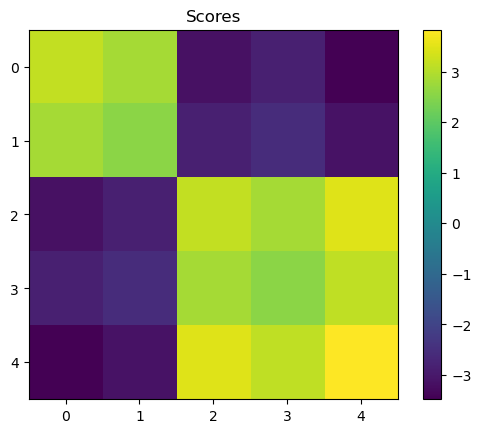

Shape of attention weights :  torch.Size([5, 5])


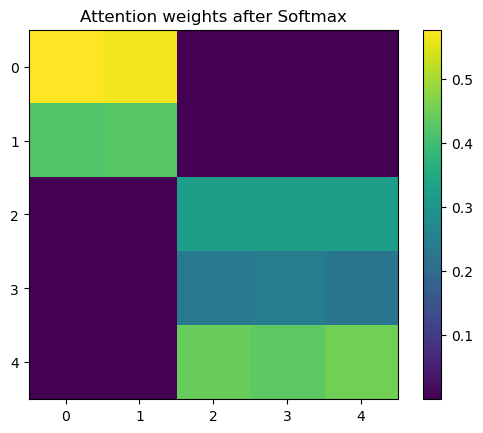

In [140]:
## Now we look at the dot prod

##TODO: Define the dot product of the Query and Key representations for all tockens with respect to each other as a single matrix of T by T. 
# After defining the contribution the final weight is obtained by doing a softmax over the 

score = Q @ K.T 

# the score is also usually multipiled by

score=score/ d**0.5

plt.imshow(score.detach())
plt.colorbar()
plt.title("Scores")
plt.show()


weights = F.softmax(score,dim=0)

print('Shape of attention weights : ', weights.shape)
plt.imshow(weights.detach())
plt.colorbar()
plt.title("Attention weights after Softmax")
plt.show()



Looking at the block nature of this attention pattern. Such an attention head could be detecting a segmentation pattern.
For example detecting what parts belong to a Question vs what parts belong to an answer. While training many such independent attention patterns will be found each looking at different relationships between tokens.

### Low temperature = decisive model , High temperature = confused PhD student at 3am


In [137]:
### In out attention formula, we can add an additional parameter that controls how sharp the attention boundaries are:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def show_attention(temp=1.0):
    scores = Q @ K.T / temp
    weights = F.softmax(scores, dim=0)
    plt.imshow(weights.detach().numpy())
    plt.colorbar()
    plt.title(f"Temperature = {np.round(temp,4)}")
    plt.show()

widgets.interact(show_attention, temp=(0.1, 5.0, 0.1))



interactive(children=(FloatSlider(value=1.0, description='temp', max=5.0, min=0.1), Output()), _dom_classes=('…

<function __main__.show_attention(temp=1.0)>

### Updating the meaning (embedding) vector for each token after one attention layer pass

After each pass through the attention layer, the embeddings become more and more meaningful and should represent more of the strucuture of Human language mirrored in the vector space. Based on this attention matrix each token/word is now assigned a new vector in the large vector space. Such that the vector now encapsulates more meaning by taking into account that words context.

The update rule is the just multiplying this matrix of attention weights $A^w$ to the value vector for that token $\vec{V}$.

So each tocken x, has three representations: 1. Key(K) , 2. Query(Q), 3. Value(V) and the rule is 

$$
x_t'=x_t+ \sum{\hat{A^w}_{tt'}\cdot v_{t'}}
$$

In [153]:
## Similar to the key and queries the value vector is obtained by multiplying with a parametrized matrix WV, for now we assume it to be arbitrary

## Todo: write down the value representation for each token and evaluate the new embedding x' for each token in the sentance.

WV = torch.randn(d,d)

V=torch.matmul(x,WV) 

print("Shape of K ", K.shape)
print("Shape of Q ", Q.shape)
print("Shape of V ", V.shape)


x_new=x+torch.matmul(weights,V)


print("\nOriginal embedding shape:", x.shape)
print("\nUpdated embedding shape:", x_new.shape)




Shape of K  torch.Size([5, 8])
Shape of Q  torch.Size([5, 8])
Shape of V  torch.Size([5, 10])

Original embedding shape: torch.Size([5, 10])

Updated embedding shape: torch.Size([5, 10])


Remember, that to produce the attention pattern in different heads, the model is learning this different **Key, Query and Value** projection matrices thorugh gradient descent. Each matrix for example in GPT 3 has over **1.5 Million parameters**.


<img src="figures/Projection_Matrices.png" width="600">

## Multi-head Attention

In an actual tranformer there are multiple such attention heads and each attention head would after training look for certain specific relations amongs tokens. The adjective-noun relationship is only one such example, can you think of other relationships that words/tokens have within a sentance?

GPT 3 for example used **100 of such attention heads** in parallel in one layer.

All $H$ attention heads have there own projection matrices: {$W_Q^i$, $W_K^i$ and $W_V^i$} for $i \in [1,N], $ and the final embedding after update is the sum of all updates.

***Excercise :*** The following is a pytorch class for an attention layer, complete the missing parts. All layers in pytorch have a similar structure, 
 1. Inherit from class nn.Module
 2. Define __init__ params.
 3. Have a forward pass function, which implements the actual layer and show how the inputs are processed in that layer.

Complete the pytorch classes for the $\texttt{SelfAttention}$ block and the $\texttt{MultiHeadAttention}$. Check whether MutiHeadAttention class gives an output of correct shape for a random input $\textbf{x}$ with the correct dimensions.


In [155]:
## Excercise: 
#The following is a pytorch class for an attention layer, complete the missing parts. All layers in pytorch have a similar structure, 
# 1. Inherit from class nn.Module
# 2. Define __init__ params.
# 3. Have a forward pass function, which implements the actual layer and show how the inputs are processed in that layer.


import torch
import torch.nn as nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, d_model: int):
        
        super().__init__()
        self.d_model = d_model
        
       
        self.Wq = nn.Linear(d_model, d_model, bias=False)
        self.Wk = nn.Linear(d_model, d_model, bias=False)
        self.Wv = nn.Linear(d_model, d_model, bias=False)

    def forward(self, x):
        """
        x: (B, T, d_model)
        returns:
          y: (B, T, d_model)
          attn: (B, T, T) attention weights
        """
        
        
        B, T, D = x.shape
        ## B is the number of training samples in a batch, or the number of example sentances
        
        Q = self.Wq(x)                      # (B, T, D)
        K = self.Wk(x)                      # (B, T, D)
        V = self.Wv(x)                      # (B, T, D)

        
        
        ## TODO ----- Evaluate the score matrix. Note that the shape of all embeddings now include many sequences (B examples). 
        # You need to transpose last two indices for K.
        
        scores = (Q  @ K.transpose(-2,-1) )   # (B, T, T)

        scores=scores/D**0.5
       

        attn = F.softmax(scores, dim=1)    # (B, T, T)
        
        y = attn @ V                        # (B, T, D)
        
        return y


##


class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, n_heads):
        super().__init__()
        
        ## list of all heads (nn.ModuleList is used to make a parallel array of predefined layers)
        self.heads = nn.ModuleList(
            [SelfAttention(d_model) for _ in range(n_heads)]
        )
        
        #self.Wo = nn.Linear(d_model * n_heads, d_model, bias=False)

    def forward(self, x):
        # run each head independently
        head_outputs = [head(x) for head in self.heads]   # shape x= [B,T,D]
        
        # ToDo: Add the results of each head
        
        multi_head_output = sum(head_outputs)
        
        # mix heads
        return multi_head_output

###
#Write code for testing the MultiHeadAttention pytorch class here: 

###

B, T, D = 2, 20, 16
x = torch.randn(B, T, D)

mha = MultiHeadAttention(D, n_heads=4)
y = mha(x)

print(y.shape)  # (2, 20, 16)



torch.Size([2, 20, 16])


After every attention block processed and updated token embedddings are passed through a feed forward NN.

<div style="display: flex; gap: 100px; align-items: center;">
    <img src="figures/encoder.png" width="200">
    <img src="figures/layers.png" width="400">
</div>


$N$ of such repetitions will make the final encoder layer of transformer. For **GPT 3**, there were 96 such repetitions. In total, **175 Billion** parameters.

<img src="figures/transformer_full.png" width="600">

### Now you are ready to build a full encoder!

Good news, the encoder is already enough for applications such as next token predictor only with a few modifications.
In fact the difference between an encoder and a decoder lies largely in whether the attention is causal or not. (Only past tokens influence or attend to future tokens or not).

GPT style LLM's are decoder only models

In [157]:
### We complete the final module that we would need after the attention mechanism, this FNN adds even richer context to each token embedding.

import torch
import torch.nn as nn
import torch.nn.functional as F

class FNN(nn.Module):
    def __init__(self, d_model, d_fnn):
        super().__init__()
        self.fc1 = nn.Linear(d_model, d_fnn)
        self.fc2 = nn.Linear(d_fnn, d_model)

    def forward(self, x):
        x = F.relu(self.fc1(x))     ## The order is then linear --> relu ---> linear
        x = self.fc2(x)
        return x




In [159]:
## Todo define the full layer of a transformer now comprising of a mutihead attention which is followed by an FNN, and test it on some input x 
# of shape [B,T,D]

class AttentionBlockLayer(nn.Module):
    def __init__(self, d_model, n_heads, d_fnn):
        super().__init__()
        
        self.attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = FNN(d_model, d_fnn)

    def forward(self, x):
        x = self.attn(x)   
        x = self.ffn(x)    #
        return x



## use nn.ModuleList() to define many iterations of EncoderLayer

class Encoder(nn.Module):
    def __init__(self, d_model, n_heads, d_fnn,n_layers):
        
        super().__init__()
        
    
   
        self.layers = nn.ModuleList(
            [AttentionBlockLayer(d_model, n_heads, d_fnn) for _ in range(n_layers)]
        )
    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        
        return x

## Code your own GPT

In this experiment, we train a small decoder-only Transformer (GPT-style model) on a copy--repeat task. This illustrates how self-attention enables the model to store and reuse information from earlier parts of a sequence.

### Task Structure

Each training sample has the structure

$[
\texttt{prefix} \;|\; \texttt{prefix repeated multiple times}.
]$

For example,
$[
\texttt{abc|abcabcabcabc}, \qquad
\texttt{bda|bdabdabdabda}, \qquad
\texttt{cdd|cddcddcddcdd}.
]$

The model is trained using autoregressive next-token prediction. 
Given a sequence of tokens $(x_1, x_2, \dots, x_t)$, the objective is to maximize

$$
\sum_{t} \log p(x_{t+1} \mid x_1, \dots, x_t).
$$

After observing the separator symbol $\texttt{|}$, the model must retrieve the earlier prefix and reproduce it repeatedly.


The copy--repeat task cannot be solved by relying only on local information. After the separator symbol, the model must attend to earlier tokens and retrieve the prefix. 

In this example we can see:

1. Long-range dependency modeling,
2. Content-based retrieval through self-attention
3. Autoregressive sequence generation.


In [158]:
import math, random, time
import torch
import torch.nn as nn
import torch.nn.functional as F

# --------- device ----------
device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)
torch.manual_seed(0); random.seed(0)

# --------- vocab ----------

chars = list("abcdefg|")  




s_to_i = {c:i for i,c in enumerate(chars)}
i_to_s = {i:c for c,i in s_to_i.items()}
V = len(chars)



# --------- toy data ----------
def make_batch(B, prefix_len=3, repeats=4):
    # example: abc|abcabcabcabc
    T = prefix_len + 1 + prefix_len*repeats
    x = torch.empty((B, T), dtype=torch.long)
    for b in range(B):
        prefix = "".join(random.choice(chars[:-1]) for _ in range(prefix_len))
        s = prefix + "|" + prefix*repeats
        x[b] = torch.tensor([s_to_i[ch] for ch in s], dtype=torch.long)
    return x.to(device)


## Visualize 5 samples in the training set
make_batch(5)


device: cpu


tensor([[6, 3, 6, 7, 6, 3, 6, 6, 3, 6, 6, 3, 6, 6, 3, 6],
        [3, 0, 2, 7, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2],
        [4, 3, 3, 7, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3],
        [6, 6, 2, 7, 6, 6, 2, 6, 6, 2, 6, 6, 2, 6, 6, 2],
        [3, 2, 4, 7, 3, 2, 4, 3, 2, 4, 3, 2, 4, 3, 2, 4]])

In [173]:



# --------- a decoder-only attention block ----------
class TinyGPT(nn.Module):
    def __init__(self, V, context_length=32, d=20, heads=2):
        
        super().__init__()
        
        self.context_length = context_length   ## Context length for gpt, memory length of past tokens
        self.d = d
        self.h = heads
        
        assert d % heads == 0
        
        self.dh = d // heads

        
        ## ---- define token embedding and postional embedding functions -----
        self.token_embedding = nn.Embedding(V, d)       ## V is the vocabulary size :: 'a' , 'b' ,'c' ... ' |'
        
        self.position_embedding = nn.Embedding(context_length, d)   

        ##-------------------------------------------
        
        
        ###---- Define WQ, WK and WV projection matrices
        self.W_Q = nn.Linear(d, d, bias=False)
        self.W_K = nn.Linear(d, d, bias=False)
        self.W_V = nn.Linear(d, d, bias=False)
        
        
        ## Additional layers that help training and convergence
        
        #self.proj = nn.Linear(d, d, bias=False)
        self.ln1 = nn.LayerNorm(d)
        #self.ln2 = nn.LayerNorm(d)

        
        ## We define Feedforward Neural Network (to be applied after the attention layer)
        
        self.ff = nn.Sequential(
            nn.Linear(d, 4*d),
            nn.ReLU(),
            nn.Linear(4*d, d),
        )

        
        ## Final output layer is a linear layer that has V output nuerons, the final predicted word will be indicated with which neuron goes high.
        ##TODO: complete self.prediction_layer
        
        self.prediction_layer = nn.Linear(d, V, bias=False)

        
        
        
        # causal mask ----- This function is necessary and ensures that gpt looks only at past tokens to predict the future ones.
        mask = torch.triu(torch.ones(context_length, context_length), diagonal=1).bool()
        self.register_buffer("mask", mask)

    
    
    def forward(self, idx):
        """
        As in all pytorch models, we also define the forward pass which tells the model the order of processing inputs based on earlier definitions. 
        
        Input: idx | torch.tensor with shape [B,T]   (B examples each of token lenght T)
        Output: logits | for each of the sequence it predicts the probabities for the next token out of V tokens. Shape [B,T,V] 
        """
        # idx: [B,T]
        
        B, T = idx.shape
        if T > self.context_length:     # Take only sequence upto the context length
            idx = idx[:, -self.context_length:]
            T = self.context_length

        
        pos = torch.arange(T, device=idx.device)  ### generate a position array , torch.arange() just ouputs a series [0,1,2....]
        
        
        #### Step 1:------  Create Total Embedding = Token_Embedding + Position_Embedding 
        
        x = self.token_embedding(idx) + self.position_embedding(pos)[None, :, :]   # [B,T,d]

        ##---------------------------------
        x_embedding = self.ln1(x)
        
        # --- Step 2: Attention ---  

        ## 1. We multiply the embeddings for each sequence to obtain the Q,K and V vectors. So each tocken is mapped to a d dimension vec.
        #  In pytorch, function calls to layers defined via nn module, implicitly already performs the multiplications on the input       
        
        Q = self.W_Q(x_embedding)       # [B, T, d]
        K = self.W_K(x_embedding)       # [B, T, d]
        V = self.W_V(x_embedding)       # [B, T, d]

        
        ##--------------------------
        
        # reshape to heads: [B,h,T,dh] , we now have multiple heads in attention heads. Each head will be trained to look at a 
        # particular relationship
        
        q = Q.view(B, T, self.h, self.dh).transpose(1, 2)
        k = K.view(B, T, self.h, self.dh).transpose(1, 2)
        v = V.view(B, T, self.h, self.dh).transpose(1, 2)

        
        
        #-------Step 3: Evaluate the attention scores and weights
         
        #The attention scores were evaluated as the dot product of the Query and the Key vectors.
        # After the scores are obtained, the weights are formed by doing a softmax over the obtained scores. To single out the most dominant- 
        # influencing tokens.
        
        att = (q @ k.transpose(-2, -1)) / math.sqrt(self.dh)  # [B,h,T,T]  (attention scores)
        
        att = att.masked_fill(self.mask[:T, :T], float("-inf"))
        
        w = F.softmax(att, dim=-1)     ## Taking softmax over the key dimension to boost dominant tokens.
        
        

        ##----- Step 4: Evaluate the correction to the input embedding x through the Value vector and the attention weights
        
        y = w @ v                                            # [B,h,T,dh]
        
        y = y.transpose(1, 2).contiguous().view(B, T, self.d) #  This step is just combining the result of all heads [B,T,d]
        
        #y = self.proj(y)

        ##Update the embedding based on attention.
        
        x = x + y                      # residual


        #x= self.ln2(x)     ### Normalize vector components
        
        ### Step 5:  Pass to feed-forward Neural network and predict next word , logits then indicate the probabilities that each-
        ### token should be the next one
        
        # new embedding x= res + feedforward
        x = x + self.ff(x)   
        logits = self.prediction_layer(x)          # [B,T,V]
        
        return logits




In [174]:

# --------- Define training conditions ----------
prefix_len = 4      ## set the length of prefix for which the training data will be generated. 
repeats = 4         ## set the number of repeats

T = prefix_len + 1 + prefix_len*repeats   ## Number of tockens in each training sequence (Add '|') Default: 21

model = TinyGPT(V, context_length=32, d=20, heads=2).to(device)
opt = torch.optim.AdamW(model.parameters(), lr=3e-3)

steps = 200         

B = 30      ## Number of training sequences for each batch




## Train the GPT

step   1 | loss 2.3630 | 0.0s
step  10 | loss 2.0681 | 0.2s
step  20 | loss 1.9646 | 0.4s
step  30 | loss 1.8368 | 0.5s
step  40 | loss 1.7640 | 0.7s
step  50 | loss 1.5963 | 0.9s
step  60 | loss 1.3612 | 1.0s
step  70 | loss 1.0368 | 1.2s
step  80 | loss 0.8400 | 1.4s
step  90 | loss 0.6078 | 1.5s
step 100 | loss 0.4532 | 1.7s
step 110 | loss 0.3938 | 1.8s
step 120 | loss 0.3571 | 2.0s
step 130 | loss 0.3448 | 2.1s
step 140 | loss 0.3301 | 2.3s
step 150 | loss 0.3439 | 2.5s
step 160 | loss 0.3253 | 2.8s
step 170 | loss 0.3148 | 3.0s
step 180 | loss 0.3117 | 3.2s
step 190 | loss 0.3108 | 3.4s
step 200 | loss 0.3016 | 3.6s


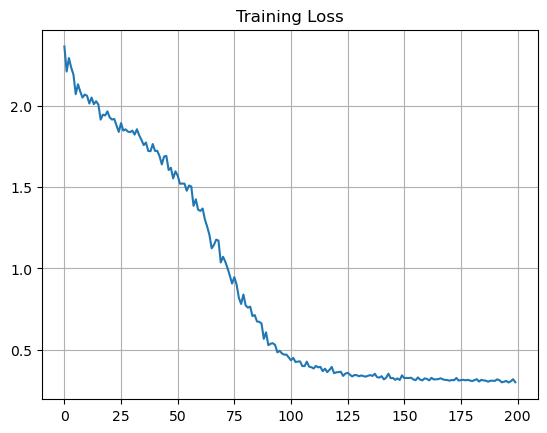

In [175]:
import matplotlib.pyplot as plt
t0 = time.time()
losses=[]
for it in range(1, steps+1):
    ## Generate a batch of B sequences
    x = make_batch(B, prefix_len, repeats)   # [B,T]
    
    inp = x[:, :-1]
    tgt = x[:, 1:]

    logits = model(inp)
    
    ### check if the prediction matched the actual succeeding token
    loss = F.cross_entropy(logits.reshape(-1, V), tgt.reshape(-1))
    ### -----

    # Clear Backpropagation values from before
    opt.zero_grad()
    # Evaluate gradients with backpropagation
    loss.backward()
    # Update parameters of model to minimize loss
    opt.step()
    l=loss.item()
    losses.append(l)
    if it % 10 == 0 or it == 1:
        print(f"step {it:3d} | loss {l:.4f} | {time.time()-t0:.1f}s")

plt.title('Training Loss')
plt.plot(losses)
plt.grid()

In [176]:
@torch.no_grad()
def sample(model, prompt="abc|", steps=20,prediction_mode='fixed'):
    
    ## put pytorch model in evaluation mode (switches off back-propagation tracking)
    model.eval()
    
    ## Convert characters to integers
    idx = torch.tensor([[s_to_i[c] for c in prompt]], device=device)
    
    ## iteratively predict next word
    for _ in range(steps):
        logits = model(idx)[:, -1, :]          # [1,V]
        
        
        ### 'fixed' mode ouputs the token which has the maximum predicted probability
        if prediction_mode=='fixed':
       
            nxt = torch.argmax(logits, dim=-1, keepdim=True)
        
        elif prediction_mode=='creative':
            
            probs = F.softmax(logits, dim=-1)
            nxt = torch.multinomial(probs, 1)  # [1,1]
            
        
        ### Concatenate predicted word to existing series
        idx = torch.cat([idx, nxt], dim=1)
    
    return "".join(i_to_s[int(i)] for i in idx[0])



In [177]:
print("\nSamples:")
p="ddbc|"
print(p, "->", sample(model, p, steps=40))


Samples:
ddbc| -> ddbc|ddbcddbcddbcddbcdcdddcdbccdcbcbcdbcdbccd
